In [46]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score



In [47]:
df=pd.read_csv('heart.csv')
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [48]:
#Count the number of rows and columns in the  dataset
df.shape
#Count the empty (NaN, NaN, na) values in each column
df.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [49]:
#Count th number of rows and columns in the dataset
df.shape

(1025, 14)

In [50]:
# Get the correlation of the columns
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


In [51]:
# Feature selection
features = df.drop('target', axis=1)  # target is the column we're trying to predict
labels = df['target']

In [52]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [53]:
# Random Forest Pipeline
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Logistic Regression Pipeline
lr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(random_state=42))
])

# Train the models
rf_pipeline.fit(X_train, y_train)
lr_pipeline.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', LogisticRegression(random_state=42))])

In [54]:
# Random Forest Predictions
rf_predictions = rf_pipeline.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f'Random Forest Accuracy: {rf_accuracy:.2f}')

# Logistic Regression Predictions
lr_predictions = lr_pipeline.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)
print(f'Logistic Regression Accuracy: {lr_accuracy:.2f}')


Random Forest Accuracy: 0.99
Logistic Regression Accuracy: 0.80


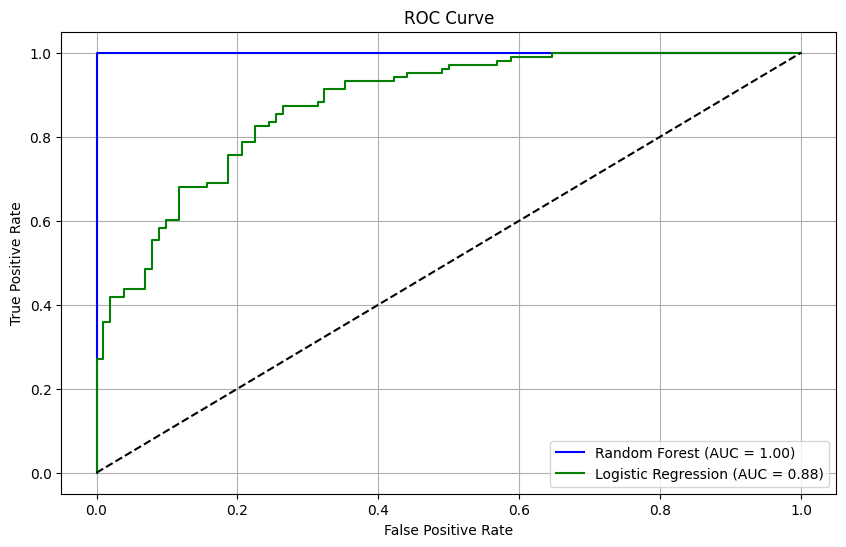

In [55]:
# ROC Curve for Random Forest
rf_probs = rf_pipeline.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)
roc_auc_rf = roc_auc_score(y_test, rf_probs)

# ROC Curve for Logistic Regression
lr_probs = lr_pipeline.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_probs)
roc_auc_lr = roc_auc_score(y_test, lr_probs)

# Plotting the ROC curve
plt.figure(figsize=(10, 6))

plt.plot(fpr_rf, tpr_rf, color='blue', label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_lr, tpr_lr, color='green', label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')

plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [56]:
# Cross-validation for Random Forest
rf_cv_scores = cross_val_score(rf_pipeline, X_train, y_train, cv=5, scoring='accuracy')
print(f'Random Forest Cross-Validation Scores: {rf_cv_scores}')
print(f'Random Forest Mean CV Accuracy: {rf_cv_scores.mean():.2f}')

# Cross-validation for Logistic Regression
lr_cv_scores = cross_val_score(lr_pipeline, X_train, y_train, cv=5, scoring='accuracy')
print(f'Logistic Regression Cross-Validation Scores: {lr_cv_scores}')
print(f'Logistic Regression Mean CV Accuracy: {lr_cv_scores.mean():.2f}')


Random Forest Cross-Validation Scores: [0.99390244 0.9695122  1.         0.98780488 0.95731707]
Random Forest Mean CV Accuracy: 0.98
Logistic Regression Cross-Validation Scores: [0.83536585 0.85365854 0.8902439  0.86585366 0.79878049]
Logistic Regression Mean CV Accuracy: 0.85
